In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

np.random.seed(42)

(100, 2)


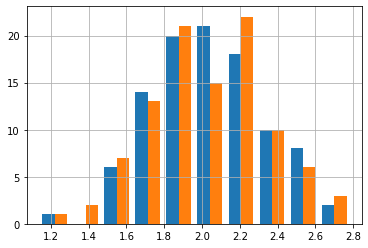

In [30]:
# Generate train data
xNP = 0.3 * np.random.randn(100, 2)#정규분포에서 100*2만들고
print(xNP.shape)
plt.hist(xNP+2)
plt.grid()
plt.show()

(200, 2)


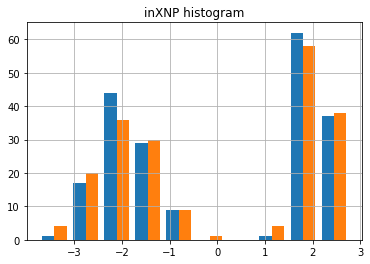

In [25]:
inXNP = np.vstack([xNP + 2, 2*xNP - 2])
print(inXNP.shape)
plt.hist(X_inliers)
plt.grid()
plt.title('inXNP histogram')
plt.show()

Text(0.5, 1.0, 'outXNP Histogram')

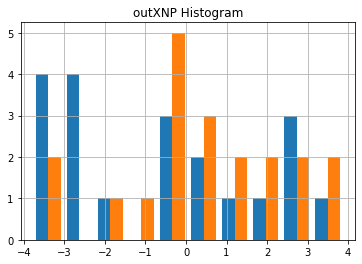

In [32]:
# Generate some outliers
outXNP = np.random.uniform(low=-4, high=4, size=(20, 2))
plt.hist(outXNP)
plt.grid()
plt.title('outXNP Histogram')

(220, 2)


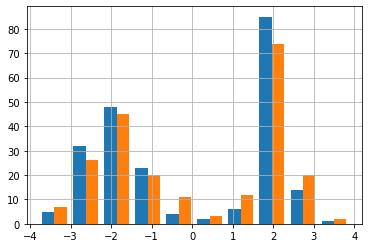

In [34]:
totalXNP = np.vstack([inXNP, outXNP])
print(totalXNP.shape)
plt.hist(totalXNP)
plt.grid()

In [36]:
n_outliers = len(X_outliers)
print(n_outliers)

20


In [39]:
ground_truth = np.ones(len(X), dtype=int)
ground_truth.shape

(220,)

In [38]:
ground_truth[-n_outliers:] = -1
ground_truth

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [40]:
#fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20,    # 이웃의 수
                         contamination=0.1) # outlier의 비율. 샘플의 점수의 threshold 역할


In [41]:
## use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X) #1,-1로 나온다.
n_errors = (y_pred != ground_truth).sum()
n_errors

22

In [43]:
X_scores = clf.negative_outlier_factor_ # The higher the more normal 
X_scores[:10]

array([-1.24420384, -1.01847948, -1.16878555, -1.08706835, -1.01634039,
       -1.12920267, -1.38326403, -1.00660474, -0.97544051, -1.10533808])

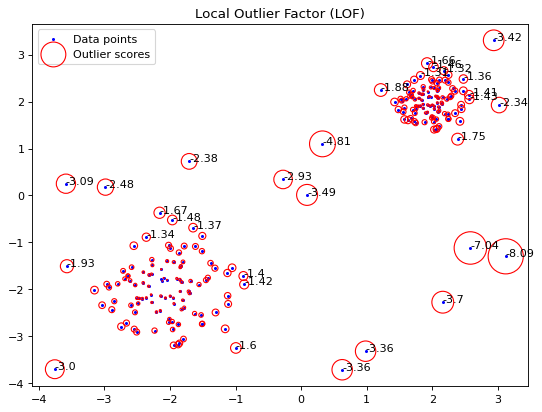

In [2]:

#fig, ax = plt.subplots()
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='b', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min()) #오홍 minmax scaling으로 radius를 정햇네
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
n=np.copy(X_scores)
n[n>-1.3]=np.nan
n=np.round(n,2)
for i, txt in enumerate(n):
    if np.isnan(txt):continue
    plt.annotate(txt, (X[i,0], X[i,1]))
legend = plt.legend(loc='upper left')
plt.show()